In [2]:
import sys
sys.path.append("../")

In [2]:

from sklearn import linear_model

import delay.calculator as calc
from delay.delay import *
from delay.strategy import fA_HardSkewTo0, fB_HardSkewTo0, showIntervalFunctions

In [12]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [5]:
def modelFunctions(N, d = 20):    
    def fA(x):
        return N/2 if x <= d else (-N/2*x+(N/2)*(N/2))/(N/2-d)

    def fB(x):
        return N/2 if x >= -d else (N/2*x+(N/2)*(N/2))/(N/2-d)
    
    return (fA, fB)

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r < prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

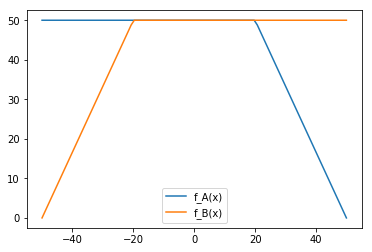

In [6]:
showIntervalFunctions(fA_HardSkewTo0, fB_HardSkewTo0, 100)

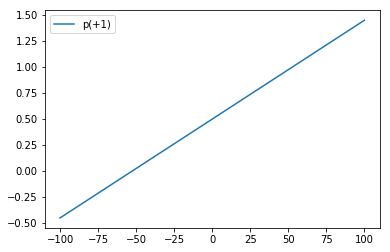

In [7]:
calculateProbability = calc.linear(100)

N = 100
x = np.linspace(-N, N, num=1000)

y = []
for xx in x:
    y.append(calculateProbability(xx))

plt.plot(x, y, label='p(+1)')

plt.legend()
plt.show()

µ =  0.2542135797312138


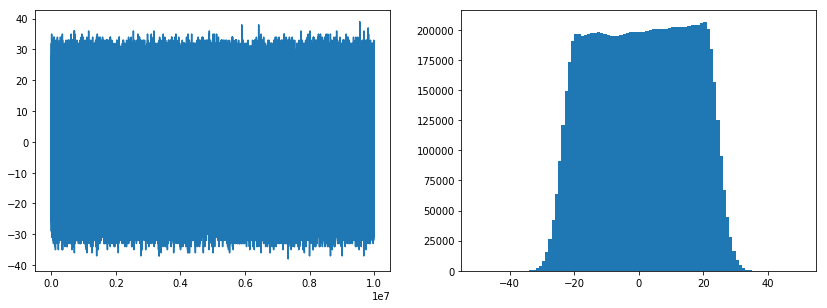

In [8]:
N = 100
tauA = 0
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

µ =  -0.5473190696996533


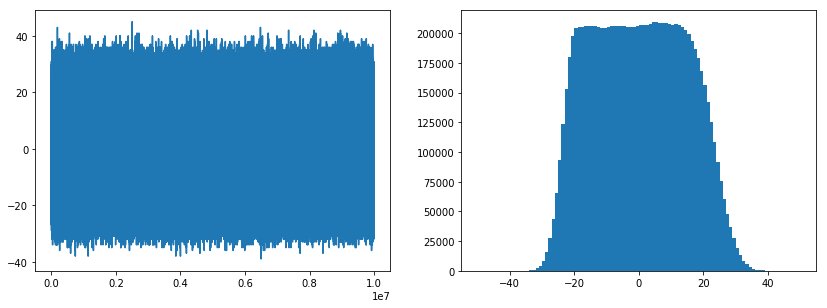

In [9]:
N = 100
tauA = 20
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));
print('µ = ', np.mean(x[100*conv:]))

µ =  0.6352005666454555


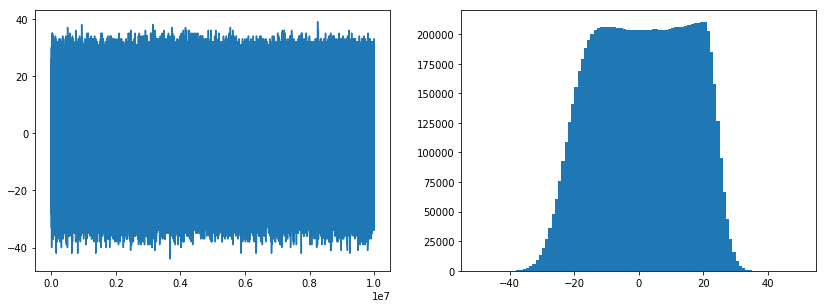

In [10]:
N = 100
tauA = 0
tauB = 20
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

In [18]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N
d = 10
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(0, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))


d, τ, µ
10 ,  0 ,  -0.0751264676903667
10 ,  10 ,  -0.32018825435298404
10 ,  20 ,  -0.4975878622248163
10 ,  30 ,  -0.7897891122422086
10 ,  40 ,  -0.9750332854492663
10 ,  50 ,  -1.1911954643901999
10 ,  60 ,  -1.4151643712110618
10 ,  70 ,  -1.605782263862998
10 ,  80 ,  -1.6628236291104563
10 ,  90 ,  -1.792727220675747
10 ,  100 ,  -1.8775769133865614


In [19]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N

tauA = 50
for i in range(0, 70):
    x = x[:101]
    d = i * 2
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

0 ,  50 ,  -0.011396581476003096
2 ,  50 ,  -0.2140978354473093
4 ,  50 ,  -0.4917723054051205
6 ,  50 ,  -0.6943778646482153
8 ,  50 ,  -0.9618137994801054
10 ,  50 ,  -1.2341209563346758
12 ,  50 ,  -1.4401763305496111
14 ,  50 ,  -1.5037510631774393
16 ,  50 ,  -1.788913545518709
18 ,  50 ,  -1.8889250469039303
20 ,  50 ,  -1.9070720105832764
22 ,  50 ,  -2.36606066345075
24 ,  50 ,  -2.615897076516043
26 ,  50 ,  -2.698458704271358
28 ,  50 ,  -2.815825185350979
30 ,  50 ,  -3.488834897665199
32 ,  50 ,  -3.210151929394908
34 ,  50 ,  -4.001911592285203
36 ,  50 ,  -4.270802066966089
38 ,  50 ,  -4.33755544613613
40 ,  50 ,  -5.471995027878097
42 ,  50 ,  -5.367988271590047
44 ,  50 ,  -6.107976686121591
46 ,  50 ,  -5.317746237000006
48 ,  50 ,  -5.271386045045991
50 ,  50 ,  -0.6113511765296467
52 ,  50 ,  0.20227833532413736
54 ,  50 ,  -0.3498581245574995
56 ,  50 ,  0.047110034222877226
58 ,  50 ,  0.010446040535526117
60 ,  50 ,  -0.38621721642253665
62 ,  50 ,  0.77415924023

In [20]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N

tauA = 50
print('d, τ, µ')
for i in (47, 49):
    x = x[:101]
    d = i
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
47 ,  50 ,  -5.520186032153228
49 ,  50 ,  -3.441512152880136


In [21]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N
d = 30
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(0, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 150
for i in range(0, 11):
    x = x[:101]
    d = i * 2
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

d, τ, µ
30 ,  0 ,  -0.2809189816999848
30 ,  10 ,  -0.8360390951002398
30 ,  20 ,  -0.9323038876183534
30 ,  30 ,  -1.7634384276995798
30 ,  40 ,  -2.1100564448747816
30 ,  50 ,  -3.4563501410045805
30 ,  60 ,  -4.230820088805909
30 ,  70 ,  -5.187815318383668
30 ,  80 ,  -5.8303539673923215
30 ,  90 ,  -5.811426931519511
30 ,  100 ,  -5.932975652598508
0 ,  150 ,  0.01228946534174179
2 ,  150 ,  -0.2341571922045633
4 ,  150 ,  -0.5734731811019729
6 ,  150 ,  -0.9287416613705908
8 ,  150 ,  -1.4266095007447872
10 ,  150 ,  -1.8931391184133173
12 ,  150 ,  -2.4155021055342685
14 ,  150 ,  -2.9435768467205685
16 ,  150 ,  -3.4931905092851414
18 ,  150 ,  -4.015768108850952
20 ,  150 ,  -4.486470256907313


In [23]:
calculateProbability(0)

0.5

In [24]:
x = [0] * 100 + [1] 
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

700 ,  150 ,  0.20931970557655022


In [25]:
print(d, ', ', tauA, ', ', np.mean(x))

700 ,  150 ,  0.2073208060598588


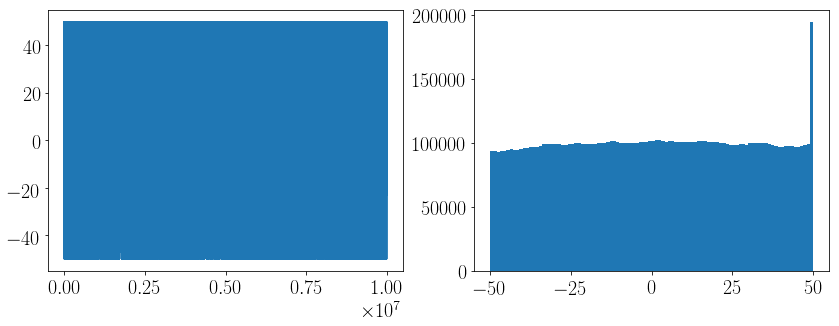

In [26]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));

In [27]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 30
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:151]
    N = i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [0] * 150 + [1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
30 ,  150 ,  50 ,  0.19383180494469002 ,  24.80616819505531
30 ,  150 ,  100 ,  -7.216126262756188 ,  57.21612626275619
30 ,  150 ,  150 ,  -5.716400082441196 ,  80.7164000824412
30 ,  150 ,  200 ,  -3.8026650448026262 ,  103.80266504480262
30 ,  150 ,  250 ,  -3.5959508519941292 ,  128.59595085199413
30 ,  150 ,  300 ,  -3.045900507409748 ,  153.04590050740975
30 ,  150 ,  350 ,  -2.3888621903712965 ,  177.3888621903713
30 ,  150 ,  400 ,  -2.401062406364028 ,  202.40106240636402
30 ,  150 ,  450 ,  -1.364839830749305 ,  226.3648398307493
30 ,  150 ,  500 ,  -1.0953440043098448 ,  251.09534400430985


In [28]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 30
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:151]
    N = 100 + i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [0] * 150 + [1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
30 ,  150 ,  150 ,  -5.659917352600576 ,  80.65991735260057
30 ,  150 ,  200 ,  -4.065092910007066 ,  104.06509291000707
30 ,  150 ,  250 ,  -3.069096753392416 ,  128.06909675339242
30 ,  150 ,  300 ,  -3.100392176254393 ,  153.1003921762544
30 ,  150 ,  350 ,  -2.2197135959206222 ,  177.2197135959206
30 ,  150 ,  400 ,  -1.7418417399296566 ,  201.74184173992967
30 ,  150 ,  450 ,  -1.8778012464476264 ,  226.87780124644763
30 ,  150 ,  500 ,  -1.6538769033621215 ,  251.65387690336212
30 ,  150 ,  550 ,  -1.4295745880117328 ,  276.42957458801175
30 ,  150 ,  600 ,  -0.6730190564687161 ,  300.6730190564687


In [29]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 30
tauA = 150

print('d, τ, N, µ, r')
for i in range(0, 35):
    x = x[:151]
    N = 290 + i*2
    (fA, fB) = modelFunctions(N, d = d)
    x = [0] * 150 + [1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


d, τ, N, µ, r
30 ,  150 ,  290 ,  -2.765048896658319 ,  147.76504889665833
30 ,  150 ,  292 ,  -3.230832446876929 ,  149.23083244687692
30 ,  150 ,  294 ,  -2.7458786158487496 ,  149.74587861584874
30 ,  150 ,  296 ,  -2.697064138469979 ,  150.69706413846998
30 ,  150 ,  298 ,  -2.319427404050249 ,  151.31942740405026
30 ,  150 ,  300 ,  -2.7937743883951303 ,  152.79377438839512
30 ,  150 ,  302 ,  -2.535215533779219 ,  153.53521553377922
30 ,  150 ,  304 ,  -2.913601806419142 ,  154.91360180641914
30 ,  150 ,  306 ,  -2.9948994764943992 ,  155.9948994764944
30 ,  150 ,  308 ,  -2.487164007831313 ,  156.48716400783132
30 ,  150 ,  310 ,  -2.95643198986682 ,  157.95643198986681
30 ,  150 ,  312 ,  -2.563451143030771 ,  158.56345114303076
30 ,  150 ,  314 ,  -2.111837748998989 ,  159.111837748999
30 ,  150 ,  316 ,  -2.828864949088357 ,  160.82886494908837
30 ,  150 ,  318 ,  -3.4008821288086635 ,  162.40088212880866
30 ,  150 ,  320 ,  -3.307989839192621 ,  163.30798983919263
30 ,  150 